In [1]:
import pandas as pd
import numpy as np
import sys
#!{sys.executable} -m pip install seaborn pandas numpy 
from datetime import datetime
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
%matplotlib inline
import seaborn as sns
import math

beer_set = pd.read_csv("beer_reviews.csv")
beer_set.shape

(1586614, 13)

In [2]:
beer_set.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [3]:
beer_set.loc[(beer_set.brewery_name.isnull())]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
651565,1193,NaN,1301022066,2.0,2.5,2.5,Knapp85,Vienna Lager,1.5,1.5,Engel Tyrolian Bräu WRONG BREWERY SEE SCHWABIS...,5.0,67503
659293,1193,NaN,1290107698,4.0,4.5,3.5,dqrull,Bock,4.0,3.5,Engel Bock Dunkel WRONG BREWERY SEE CRAILSHEIMER,7.2,63658
659299,1193,NaN,1289077001,3.5,3.0,3.0,dqrull,Dortmunder / Export Lager,4.0,4.0,Engel Gold WRONG BREWERY SEE CRAILSHEIMER,5.4,63215
659300,1193,NaN,1289851033,3.5,4.0,3.5,dqrull,Munich Helles Lager,3.5,3.0,Engel Landbier WRONG BREWERY SEE CRAILSHEIMER,4.8,63557
659301,1193,NaN,1289158632,3.5,4.0,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,3.5,Engel Keller Hell WRONG BREWERY SEE CRAILSHEIMER,5.4,63256
659302,1193,NaN,1289590065,3.5,4.0,3.0,dqrull,Vienna Lager,3.0,3.5,Engel Aloisius - WRONG BREWERY SEE CRAILSHEIMER,5.9,63459
659303,1193,NaN,1298078926,3.0,3.0,3.0,Ochsenblut,Keller Bier / Zwickel Bier,2.0,3.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659304,1193,NaN,1292423271,4.5,4.0,4.0,Dentist666,Keller Bier / Zwickel Bier,4.0,4.5,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
659305,1193,NaN,1289329962,3.5,3.5,4.0,dqrull,Keller Bier / Zwickel Bier,4.0,4.0,Engel Keller Dunkel WRONG BREWERY SEE CRAILSH...,5.3,63324
1391043,27,NaN,1020244856,3.5,3.5,3.5,Jason,American Adjunct Lager,4.0,3.5,Hard Hat American Beer,3.8,60


In [4]:
beer_set.loc[beer_set.beer_abv.isnull()]

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
273,1075,Caldera Brewing Company,1103668195,3.0,3.0,3.0,RedDiamond,American Stout,4.0,3.0,Cauldron Espresso Stout,NaN,21241
430,850,Moon River Brewing Company,1110736110,3.5,4.0,4.5,cMonkey,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
603,850,Moon River Brewing Company,1100038819,4.0,3.5,4.0,aracauna,Scotch Ale / Wee Heavy,3.5,3.5,The Highland Stagger,NaN,20689
733,1075,Caldera Brewing Company,1260673921,4.0,4.0,4.0,plaid75,American IPA,4.0,4.0,Alpha Beta,NaN,54723
798,1075,Caldera Brewing Company,1212201268,4.5,4.5,4.0,grumpy,American Double / Imperial Stout,4.0,4.5,Imperial Stout,NaN,42964
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586568,14359,The Defiant Brewing Company,1187052567,4.0,3.5,4.0,maddogruss,Bock,4.0,4.0,Bock,NaN,36424
1586587,14359,The Defiant Brewing Company,1177842168,3.5,4.5,4.0,BBM,Maibock / Helles Bock,4.5,4.0,Maibock,NaN,36555
1586596,14359,The Defiant Brewing Company,1287951067,4.0,3.0,5.0,hoppymcgee,Belgian Strong Pale Ale,4.0,3.5,Resolution #2,NaN,48360
1586597,14359,The Defiant Brewing Company,1241906223,4.5,4.5,4.0,WesWes,Belgian Strong Pale Ale,4.0,4.0,Resolution #2,NaN,48360


In [5]:
biere_missing = beer_set.isnull().sum().sum();
biere_total = np.product(beer_set.shape)
print((biere_missing/biere_total)*100)
print(biere_total,biere_missing)

0.3303988144661428
20625982 68148


In [6]:
beer_set = beer_set.dropna()
beer_set.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [7]:
beer_set.review_time = beer_set.review_time.map(lambda timestamp:datetime.fromtimestamp(timestamp))
beer_set.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,2009-02-16 21:57:03,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,2009-03-01 14:44:57,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,2009-03-01 15:10:04,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,2009-02-15 20:12:25,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,2010-12-30 19:53:26,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [53]:
beer_set['beer_beerid'].value_counts()
aggregation_functions = {'brewery_id': 'first', 'review_time': 'first', 'brewery_name': 'first','review_overall':'mean','review_aroma':'mean','review_appearance':'mean','review_profilename':'first','beer_style':'first','review_palate':'mean','review_taste':'mean','beer_name':'first','beer_abv':'mean','beer_beerid':'first'}
beer_cleaned = beer_set.groupby(beer_set['beer_beerid']).aggregate(aggregation_functions)

In [9]:
beer_cleaned.shape
beer_cleaned.head()

,brewery_id,review_time,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
beer_beerid,,,,,,,,,,,,,
5,3,2005-07-16 04:14:09,Abita Brewing Co.,3.549528,3.205189,3.485849,Backer2004,Vienna Lager,3.318396,3.340802,Amber,4.5,5
6,3,2007-10-27 06:04:10,Abita Brewing Co.,3.706956,3.515964,3.836374,Strix,English Brown Ale,3.513113,3.645382,Turbodog,5.6,6
7,3,2009-01-13 06:35:16,Abita Brewing Co.,3.266313,3.179059,3.251138,matty,Fruit / Vegetable Beer,3.106980,3.101669,Purple Haze,4.2,7
8,3,2011-06-05 20:26:09,Abita Brewing Co.,3.647059,3.080882,3.294118,optimator13,American Adjunct Lager,3.301471,3.235294,Wheat,4.2,8
9,3,2005-08-29 04:14:19,Abita Brewing Co.,3.400862,2.853448,3.051724,walleye,American Pale Lager,3.103448,3.043103,Golden,4.2,9


In [10]:
beer_cleaned.review_overall.describe()

count    49000.000000
mean         3.658623
std          0.613237
min          1.000000
25%          3.429868
50%          3.750000
75%          4.000000
max          5.000000
Name: review_overall, dtype: float64

In [11]:
beer_cleaned.review_aroma.describe()

count    49000.000000
mean         3.566552
std          0.585125
min          1.000000
25%          3.262895
50%          3.625000
75%          4.000000
max          5.000000
Name: review_aroma, dtype: float64

In [12]:
beer_cleaned.review_appearance.describe()

count    49000.000000
mean         3.693760
std          0.503210
min          1.000000
25%          3.500000
50%          3.785714
75%          4.000000
max          5.000000
Name: review_appearance, dtype: float64

In [13]:
beer_cleaned.review_palate.describe()

count    49000.000000
mean         3.584703
std          0.574908
min          1.000000
25%          3.305556
50%          3.666667
75%          4.000000
max          5.000000
Name: review_palate, dtype: float64

In [14]:
beer_cleaned.review_taste.describe()

count    49000.000000
mean         3.611682
std          0.621814
min          1.000000
25%          3.333333
50%          3.723309
75%          4.000000
max          5.000000
Name: review_taste, dtype: float64

In [15]:
beer_cleaned.beer_abv.describe()

count    49000.000000
mean         6.271987
std          2.051083
min          0.010000
25%          5.000000
50%          5.700000
75%          7.200000
max         57.700000
Name: beer_abv, dtype: float64

In [16]:
beer_cleaned.beer_style.describe()

count            49000
unique             104
top       American IPA
freq              2503
Name: beer_style, dtype: object

In [17]:
beer_set.review_profilename.describe()

count            1518478
unique             32908
top       northyorksammy
freq                5346
Name: review_profilename, dtype: object

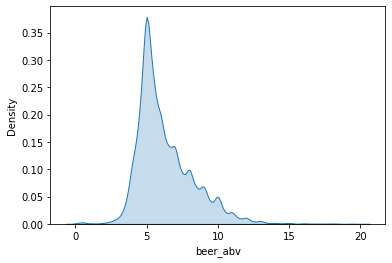

In [18]:
beer_abv_under_20 = beer_cleaned
for row in beer_abv_under_20.itertuples():
    if(row.beer_abv > 20):
        beer_abv_under_20 = beer_abv_under_20.drop(row.beer_beerid,axis=0)
sns.kdeplot(data=beer_abv_under_20['beer_abv'],shade=True)
beer_review_overall_interval = beer_abv_under_20

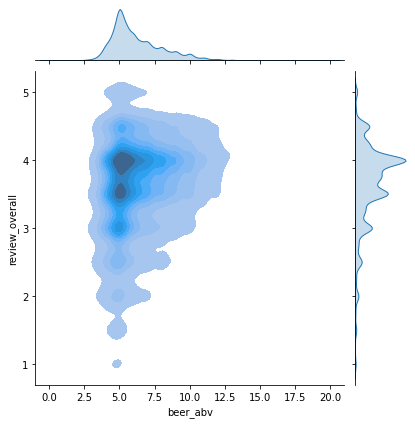

In [19]:
sns.jointplot(x=beer_abv_under_20['beer_abv'], y=beer_abv_under_20['review_overall'], kind="kde",fill=True)

ValueError: Could not interpret value `score` for parameter `hue`

In [21]:
beer_abv_under_20['freq_brewery'] = beer_abv_under_20.groupby('brewery_name')['brewery_name'].transform('count')
beer_abv_under_20['index'] = range(len(beer_abv_under_20))
beer_abv_under_20.set_index('index')

,brewery_id,review_time,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,freq_brewery
index,,,,,,,,,,,,,,
0,3,2005-07-16 04:14:09,Abita Brewing Co.,3.549528,3.205189,3.485849,Backer2004,Vienna Lager,3.318396,3.340802,Amber,4.5,5,40
1,3,2007-10-27 06:04:10,Abita Brewing Co.,3.706956,3.515964,3.836374,Strix,English Brown Ale,3.513113,3.645382,Turbodog,5.6,6,40
2,3,2009-01-13 06:35:16,Abita Brewing Co.,3.266313,3.179059,3.251138,matty,Fruit / Vegetable Beer,3.106980,3.101669,Purple Haze,4.2,7,40
3,3,2011-06-05 20:26:09,Abita Brewing Co.,3.647059,3.080882,3.294118,optimator13,American Adjunct Lager,3.301471,3.235294,Wheat,4.2,8,40
4,3,2005-08-29 04:14:19,Abita Brewing Co.,3.400862,2.853448,3.051724,walleye,American Pale Lager,3.103448,3.043103,Golden,4.2,9,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48977,18604,2012-01-10 23:45:28,Lervig Aktiebryggeri AS,4.000000,3.000000,4.500000,Radome,Witbier,3.500000,4.500000,White Dog Norwegian Wheat Beer,4.7,77312,3
48978,185,2012-01-10 23:56:42,Aass Brewery,3.000000,3.000000,4.000000,Radome,American Blonde Ale,3.000000,3.000000,Aass Gourmet Pale Ale,4.7,77313,10
48979,18604,2012-01-11 00:04:36,Lervig Aktiebryggeri AS,3.500000,3.500000,4.000000,Radome,American Brown Ale,3.000000,4.000000,Betty Brown Norwegian Brwon Ale,4.7,77314,3


In [22]:
aggregation_functions = {'brewery_id': 'first', 'review_time': 'last', 'brewery_name': 'first','review_overall':'mean','review_aroma':'mean','review_appearance':'mean','review_profilename':'first','beer_style':'first','review_palate':'mean','review_taste':'mean','beer_name':'first','beer_abv':'mean','beer_beerid':'first','freq_brewery':'first'}
brewery_freq = beer_abv_under_20.groupby(beer_abv_under_20['brewery_id']).aggregate(aggregation_functions)

In [23]:
brewery_freq.head()

,brewery_id,review_time,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,freq_brewery
brewery_id,,,,,,,,,,,,,,
1,1,2011-07-19 02:58:39,"Plzensky Prazdroj, a. s.",3.650061,3.382810,3.525697,CampusCrew,Czech Pilsener,3.526538,3.484731,Pilsner Urquell,4.876923,429,13
3,3,2012-01-04 21:25:34,Abita Brewing Co.,3.603484,3.436219,3.695821,Backer2004,Vienna Lager,3.480899,3.446385,Amber,6.237500,5,40
4,4,2011-12-16 04:35:20,Allagash Brewing Company,4.059422,4.038299,4.010710,pezoids,Dubbel,4.048312,4.114111,Allagash Dubbel Ale,8.384068,10,59
5,5,2005-10-22 06:57:20,Yakima Brewing Co. / Bert Grant's Ales,3.687076,3.614858,3.717269,clvand0,Scottish Ale,3.522460,3.475764,Bert Grant's Scottish Ale,4.837500,11,8
6,6,2011-01-16 22:15:23,Brouwerij Slaghmuylder,3.509745,3.534802,3.425140,fattyre,Belgian Pale Ale,3.296195,3.492846,Witkap Pater Singel / Stimulo,6.018182,14,11


In [24]:
brewery_freq = brewery_freq.sort_values(by=['freq_brewery'])

In [25]:
beer_abv_under_20.brewery_name.describe()

count                                48982
unique                                5155
top       Rock Bottom Restaurant & Brewery
freq                                   528
Name: brewery_name, dtype: object

In [26]:
brewery_freq.tail()

,brewery_id,review_time,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,freq_brewery
brewery_id,,,,,,,,,,,,,,
1177,1177,2011-12-29 01:44:27,Minneapolis Town Hall Brewery,4.149635,4.075600,4.036097,fisherman34,American Blonde Ale,4.050327,4.124739,Bright Spot Golden Ale,6.468436,6362,243
6045,6045,2012-01-10 00:40:48,Iron Hill Brewery & Restaurant,3.917990,3.877603,3.909758,mophie,Belgian Dark Ale,3.905264,3.923843,Grand Cru,7.195539,3429,269
1549,1549,2012-01-06 20:24:45,Goose Island Beer Co.,3.924858,3.896268,3.935124,jahred,Belgian Strong Dark Ale,3.906501,3.905778,Blue,6.858849,804,304
227,227,2008-04-11 05:35:39,Rock Bottom Restaurant & Brewery,3.880208,3.778646,3.932292,fdrich29,Russian Imperial Stout,3.526042,3.703993,Czar's Nightmare Imperial Stout,5.456250,16263,528
1550,1550,2011-12-31 06:51:56,Rock Bottom Restaurant & Brewery,3.850256,3.681333,3.817705,Mebuzzard,Light Lager,3.763830,3.804086,Lumpy Dog Light Lager,6.406719,2690,528


In [27]:
brewery_freq.shape

(5230, 14)

In [28]:
brewery_best_5 = brewery_freq.tail(5)
brewery_freq.iloc[-1]

brewery_id                                        1550
review_time                        2011-12-31 06:51:56
brewery_name          Rock Bottom Restaurant & Brewery
review_overall                                3.850256
review_aroma                                  3.681333
review_appearance                             3.817705
review_profilename                           Mebuzzard
beer_style                                 Light Lager
review_palate                                  3.76383
review_taste                                  3.804086
beer_name                        Lumpy Dog Light Lager
beer_abv                                      6.406719
beer_beerid                                       2690
freq_brewery                                       528
Name: 1550, dtype: object

In [29]:
brewery_freq.iloc[-2]

brewery_id                                         227
review_time                        2008-04-11 05:35:39
brewery_name          Rock Bottom Restaurant & Brewery
review_overall                                3.880208
review_aroma                                  3.778646
review_appearance                             3.932292
review_profilename                            fdrich29
beer_style                      Russian Imperial Stout
review_palate                                 3.526042
review_taste                                  3.703993
beer_name              Czar's Nightmare Imperial Stout
beer_abv                                       5.45625
beer_beerid                                      16263
freq_brewery                                       528
Name: 227, dtype: object

<AxesSubplot:title={'center':"Brewery's beers production"}, xlabel='brewery_name', ylabel='freq_brewery'>

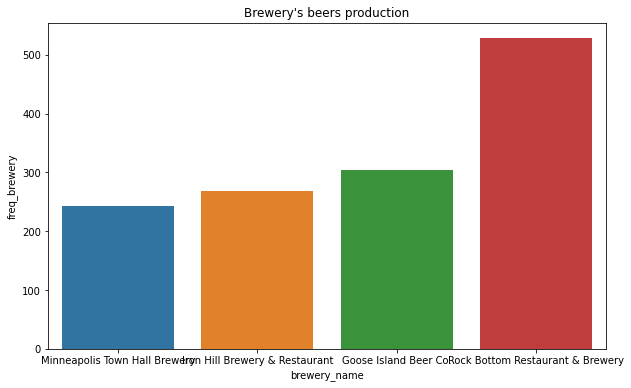

In [30]:
plt.figure(figsize=(10,6))
plt.title("Brewery's beers production")
sns.barplot(x=brewery_best_5.brewery_name, y=brewery_best_5['freq_brewery'])

In [31]:
beer_abv_under_20.tail()

,brewery_id,review_time,brewery_name,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid,freq_brewery,index
beer_beerid,,,,,,,,,,,,,,,
77312,18604,2012-01-10 23:45:28,Lervig Aktiebryggeri AS,4.0,3.0,4.5,Radome,Witbier,3.5,4.5,White Dog Norwegian Wheat Beer,4.7,77312,3,48977
77313,185,2012-01-10 23:56:42,Aass Brewery,3.0,3.0,4.0,Radome,American Blonde Ale,3.0,3.0,Aass Gourmet Pale Ale,4.7,77313,10,48978
77314,18604,2012-01-11 00:04:36,Lervig Aktiebryggeri AS,3.5,3.5,4.0,Radome,American Brown Ale,3.0,4.0,Betty Brown Norwegian Brwon Ale,4.7,77314,3,48979
77315,27839,2012-01-11 00:38:05,Einstök Ölgerð,3.5,4.5,3.0,thepeter,Witbier,3.0,3.5,Icelandic White Beer,5.2,77315,4,48980
77316,20330,2012-01-11 04:20:38,Eddyline Restaurant & Brewery,3.5,3.5,3.5,indiapaleale,American IPA,3.5,3.5,Crank Yanker IPA,7.8,77316,2,48981


In [56]:
beer_review_overall_interval.shape

(48982, 16)

In [33]:
beer_review_overall_interval['review_overall_interval'] = ""
for row in beer_review_overall_interval.itertuples():
    review_overall = row.review_overall
    if review_overall < 2:
        beer_review_overall_interval.at[row.beer_beerid,'review_overall_interval'] = "[1 -> 2["
    elif review_overall < 3 :
        beer_review_overall_interval.at[row.beer_beerid,'review_overall_interval'] = "[2 -> 3["
    elif review_overall < 4:
        beer_review_overall_interval.at[row.beer_beerid,'review_overall_interval'] = "[3 -> 4["
    else:
        beer_review_overall_interval.at[row.beer_beerid,'review_overall_interval'] = "[4 -> 5]"

In [71]:
beer_cross = beer_review_overall_interval.loc[:,["beer_style", "review_overall_interval","brewery_name","beer_abv"]]
beer_cross

,beer_style,review_overall_interval,brewery_name,beer_abv
beer_beerid,,,,
5,Vienna Lager,[3 -> 4[,Abita Brewing Co.,4.5
6,English Brown Ale,[3 -> 4[,Abita Brewing Co.,5.6
7,Fruit / Vegetable Beer,[3 -> 4[,Abita Brewing Co.,4.2
8,American Adjunct Lager,[3 -> 4[,Abita Brewing Co.,4.2
9,American Pale Lager,[3 -> 4[,Abita Brewing Co.,4.2
...,...,...,...,...
77312,Witbier,[4 -> 5],Lervig Aktiebryggeri AS,4.7
77313,American Blonde Ale,[3 -> 4[,Aass Brewery,4.7
77314,American Brown Ale,[3 -> 4[,Lervig Aktiebryggeri AS,4.7


In [35]:
tableau_croise_test = pd.crosstab(beer_cross["beer_style"],beer_cross["review_overall_interval"], margins=True)
pd.crosstab(beer_cross["beer_style"],beer_cross["review_overall_interval"], margins=True)

review_overall_interval,[1 -> 2[,[2 -> 3[,[3 -> 4[,[4 -> 5],All
beer_style,,,,,
Altbier,1,20,199,166,386
American Adjunct Lager,106,362,349,45,862
American Amber / Red Ale,8,122,938,531,1599
American Amber / Red Lager,4,35,135,49,223
American Barleywine,3,18,330,344,695
...,...,...,...,...,...
Weizenbock,1,4,116,126,247
Wheatwine,1,2,60,46,109
Winter Warmer,1,20,306,165,492


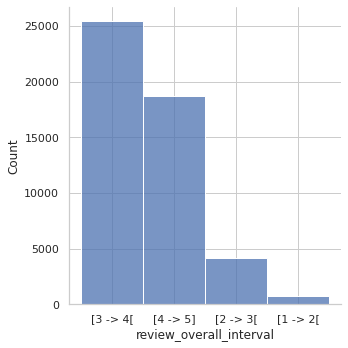

In [81]:
sns.displot(beer_cross, x="review_overall_interval")

<AxesSubplot:title={'center':'Review interval by beer style'}, xlabel='beer_style'>

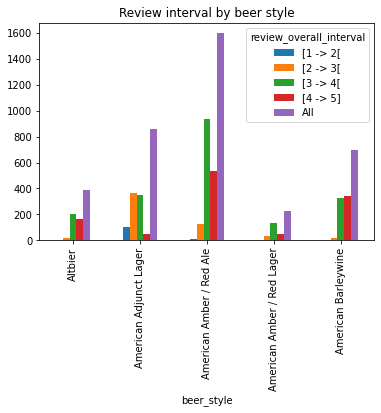

In [36]:
tableau_croise_test.head().plot.bar(title = "Review interval by beer style",)

In [82]:
tableau_croise_test.head()

review_overall_interval,[1 -> 2[,[2 -> 3[,[3 -> 4[,[4 -> 5],All
beer_style,,,,,
Altbier,1,20,199,166,386
American Adjunct Lager,106,362,349,45,862
American Amber / Red Ale,8,122,938,531,1599
American Amber / Red Lager,4,35,135,49,223
American Barleywine,3,18,330,344,695


In [54]:
tableau_croise_test

review_overall_interval,[1 -> 2[,[2 -> 3[,[3 -> 4[,[4 -> 5],All
beer_style,,,,,
Altbier,1,20,199,166,386
American Adjunct Lager,106,362,349,45,862
American Amber / Red Ale,8,122,938,531,1599
American Amber / Red Lager,4,35,135,49,223
American Barleywine,3,18,330,344,695
...,...,...,...,...,...
Weizenbock,1,4,116,126,247
Wheatwine,1,2,60,46,109
Winter Warmer,1,20,306,165,492


In [50]:
pd.crosstab(beer_cross["brewery_name"],beer_cross["review_overall_interval"], margins=True)

review_overall_interval,[1 -> 2[,[2 -> 3[,[3 -> 4[,[4 -> 5],All
brewery_name,,,,,
't Hofbrouwerijke,0,0,5,2,7
(512) Brewing Company,0,0,6,7,13
10 Barrel Brewing Co.,0,0,7,4,11
1516 Brewing Company,0,0,1,3,4
16 Mile Brewing Company,0,0,5,1,6
...,...,...,...,...,...
Öufi Brauerei,0,0,1,0,1
Ølfabrikken,0,1,15,18,34
Ørbæk Bryggeri,0,2,6,2,10


In [84]:
pd.crosstab(beer_cross["brewery_name"],beer_cross["beer_style"], margins=True)

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier,All
brewery_name,,,,,,,,,,,,,,,,,,,,,
't Hofbrouwerijke,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7
(512) Brewing Company,1,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,1,13
10 Barrel Brewing Co.,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,11
1516 Brewing Company,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
16 Mile Brewing Company,0,0,0,0,0,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Öufi Brauerei,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Ølfabrikken,0,0,0,0,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,34
Ørbæk Bryggeri,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,10
